# Unveiling Illicit Currents: An Analytical Exploration of Electricity Consumption Patterns for Detecting Theft in the Power Grid

## Goal
The goal of this capstone project is to develop a robust system for identifying and mitigating electricity theft within the electric grid. Using classification models, the project aims to analyze electricity consumption behavior patterns of users, employing various data mining and machine learning techniques. The ultimate objective is to enhance the efficiency of theft detection, contributing to the financial stability of utility companies, ensuring the safety and reliability of the electric grid, and aligning with legal and ethical standards.

## Data Problem
The data problem involves utilizing datasets such as the SGCC Electricity Theft Detection and Theft Detection in Smart Grid Environment. The challenge is to preprocess and analyze these datasets effectively, considering the vast amount of information related to electric consumption over time. The focus will be on identifying anomalies or patterns indicative of electricity theft, with an emphasis on selecting relevant features and cleaning the data to enable accurate modeling.

## Expected Results
The expected results of this project include the development of predictive models, algorithms, or data-driven insights that can effectively identify patterns associated with electricity theft. This may involve the application of models like K-Nearest Neighbors, Decision Trees, SVMs and others. Visualizations and reports will be generated to facilitate the interpretation of results by utility companies or law enforcement. The project aims to provide a practical solution for combating electricity theft, contributing to improved financial stability, enhanced safety, and more efficient resource management within the energy industry.

## Data
The dataset name is [SGCC Electricity Theft Detection](https://www.kaggle.com/datasets/bensalem14/sgcc-dataset/)

### About Dataset
- **Overview**

    The State Grid Corporation of China (SGCC) dataset with 1000 records was used in the model. This is a key resource in the field of power distribution and management, with a large and varied set of data about electricity transport and grid operations. This set of data contains a lot of different kinds of information, such as history and real-time data on energy use, grid infrastructure, the integration of green energy, and grid performance.
    
- **Description**

    Electricity theft detection released by the State Grid Corporation of China (SGCC) dataset data set.csv contains 1037 columns and 42,372 rows for electric consumption from January first 2014 to 30 October 2016. SGCC data first column is consumer ID that is alphanumeric. Then from column 2 to columns 1036 daily electricity consumption is given. Last column named flag is the labels in 0 and 1 values.

- **Features**

    - ***'MM/DD/YYYY':*** The electric consumption on a given day.
    - ***CONS_NO:*** Consumer Number stands for a customer ID of string type.
    - ***FLAG:*** 0 indicating no theft and 1 for theft.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from tabulate import tabulate

In [2]:
# Install important packages
#pip install imbalanced-learn
#pip install xgboost

# Analysis without clean data

In [3]:
# Load the dataset
df = pd.read_csv("Data/data set.csv")

In [4]:
# Visualize 5 random rows
df.sample(5)

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,CONS_NO,FLAG
37853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.45,28.24,33.48,32.75,24.35,19.83,12.70,20.99,622198BD3D122416C4B97B5B63048A61,0
24843,23.80,15.34,14.39,16.79,16.32,17.83,15.45,17.18,14.19,17.54,...,30.01,19.11,38.05,28.09,32.22,31.29,13.13,16.37,DB7815B4021F6CE55DC08E3EBEF14245,1
27825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.84,5.48,12.31,12.88,10.99,17.60,10.29,7.32,CC867D183DC3C289A5DEE95C705B640B,0
18422,7.85,5.23,4.76,7.15,6.18,5.78,7.04,5.25,5.27,6.95,...,7.21,7.93,11.84,12.39,7.16,6.14,7.94,4.91,CCA277DC570A1B17645DCF8ABDFBCD70,0
10860,1.86,1.77,1.80,6.30,2.37,1.68,2.10,1.71,2.49,1.73,...,3.34,3.59,3.84,3.46,3.48,3.96,3.13,1.92,C28A859455B8AFE17D22E63AF1FD0880,0


In [5]:
# Statistical summary of the dataset
df.describe()

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
count,25870.000000,25873.000000,25872.000000,25874.000000,25874.000000,25878.000000,25879.000000,25907.000000,25907.000000,25912.000000,...,41824.000000,41820.000000,41665.000000,41623.000000,41397.000000,41443.000000,41637.000000,41634.000000,41569.000000,42372.000000
mean,7.168735,7.057237,6.704972,7.237638,7.394550,6.939544,7.271432,6.862706,6.956579,6.954202,...,9.692272,8.503682,9.032455,9.396710,9.878270,9.934374,8.845107,8.355138,8.224294,0.085316
std,34.131237,30.086443,31.223720,49.508191,41.464202,37.583286,64.114745,34.842458,39.684055,40.017856,...,75.590148,81.278000,79.378526,80.896258,92.312243,88.382736,84.201505,78.702362,70.861576,0.279354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.810000,0.750000,0.790000,0.810000,0.840000,0.870000,0.790000,0.770000,0.770000,0.000000
50%,3.310000,3.400000,3.110000,3.340000,3.560000,3.325000,3.120000,3.210000,3.120000,2.870000,...,4.780000,4.290000,4.420000,4.530000,4.650000,4.710000,4.450000,4.390000,4.290000,0.000000
75%,8.910000,8.570000,8.110000,8.320000,8.880000,8.290000,8.090000,8.120000,8.210000,8.170000,...,9.662500,8.400000,8.680000,9.010000,9.350000,9.510000,8.750000,8.490000,8.110000,0.000000
max,3318.000000,2500.000000,2674.000000,5670.000000,4854.000000,4170.000000,7119.810000,3546.000000,4416.000000,3966.000000,...,11100.000000,13560.000000,11940.000000,12480.000000,15180.000000,14970.000000,14100.000000,12480.000000,9990.000000,1.000000


In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, 1/1/2014 to FLAG
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


## Analyze null data

### Analyze what portion of the total data is null

In [7]:
# Calculate the total count of null and non-null values in the dataset
total_nulls = df.isnull().sum().sum()
total_non_nulls = df.notnull().sum().sum()

In [8]:
# Create a DataFrame with the results
total_data_counts = pd.DataFrame({'Null Data': [total_nulls], 'Not Null Data': [total_non_nulls]})

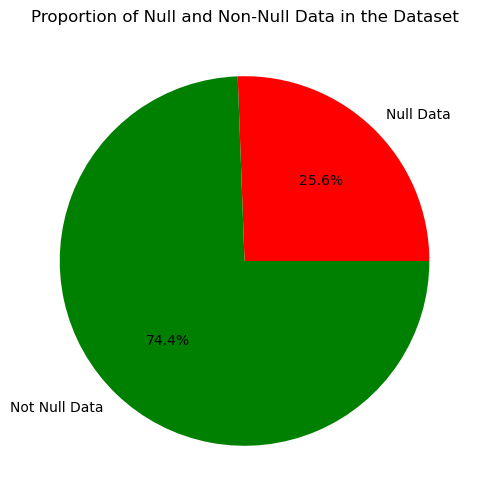

In [9]:
# Plot the result on a pie chart.
plt.figure(figsize=(6, 6))
plt.pie(total_data_counts.iloc[0], labels=total_data_counts.columns, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Proportion of Null and Non-Null Data in the Dataset')
plt.show()

### Calculate the distribution of the percentage of null records for users

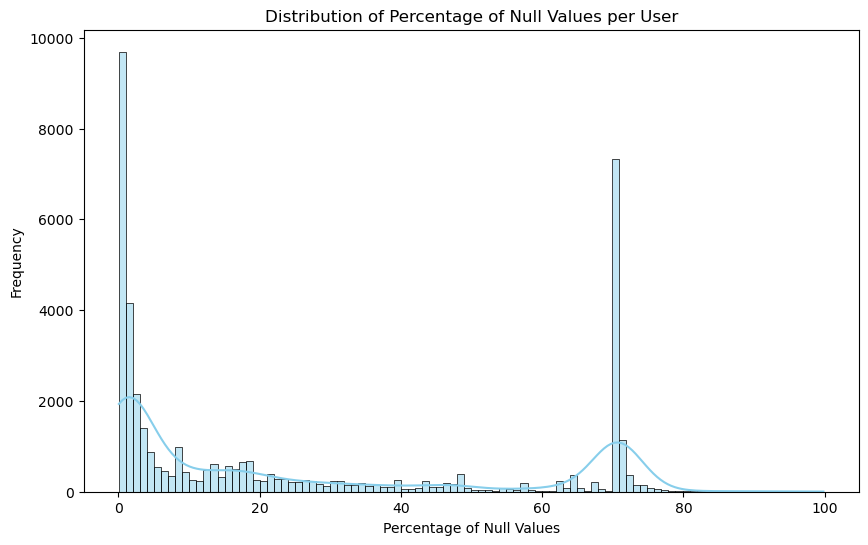

In [10]:
# Calculate the percentage of null values per row
null_percentage_per_row = (df.isnull().sum(axis=1) / df.shape[1]) * 100

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(null_percentage_per_row, bins=100, kde=True, color='skyblue')
plt.title('Distribution of Percentage of Null Values per User')
plt.xlabel('Percentage of Null Values')
plt.ylabel('Frequency')
plt.show()

It can be observed that the majority of users with null values have a percentage of null data less than 20%. However, there is a significant number that has 70% of null values.

### Look at how many records have more than 50% null data from the total

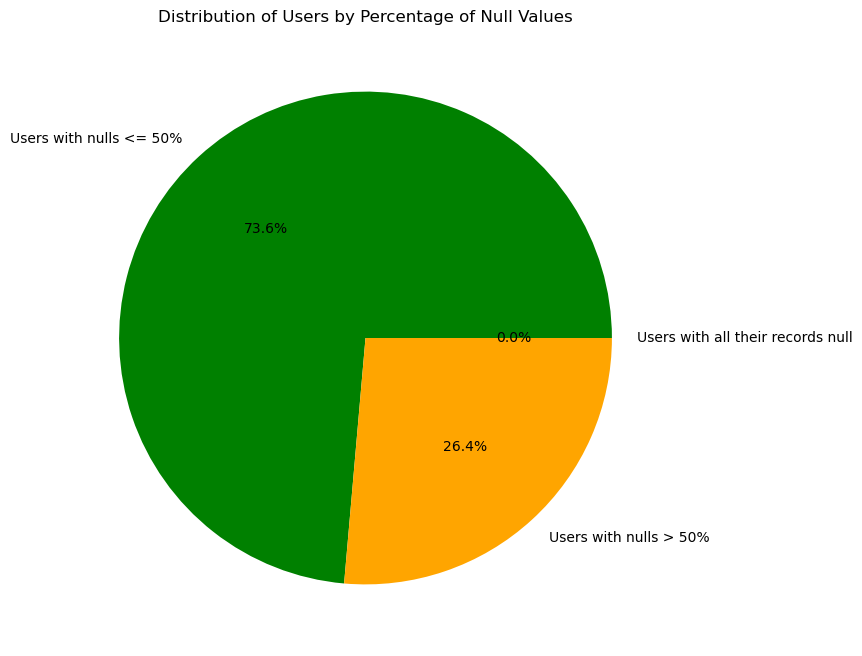

In [11]:
# Calculate the percentage of null values per row
null_percentage_per_row = (df.isnull().sum(axis=1) / df.shape[1]) * 100

# Classify users according to the thresholds.
users_all_non_null = (null_percentage_per_row == 0).sum()
users_null_below_20 = ((null_percentage_per_row > 0) & (null_percentage_per_row <= 50)).sum()
users_null_above_20 = (null_percentage_per_row > 50).sum()

# Create a pie chart.
labels = ['Users with all their records null', 'Users with nulls <= 50%', 'Users with nulls > 50%']
sizes = [users_all_non_null, users_null_below_20, users_null_above_20]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'green', 'orange'])
plt.title('Distribution of Users by Percentage of Null Values')
plt.show()

### Search for columns that are empty 

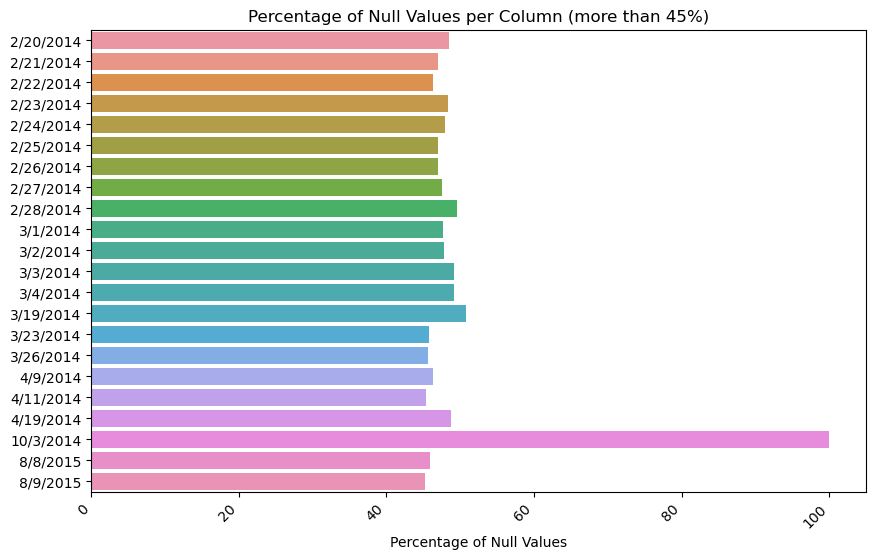

In [12]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns that have more than 45% missing values
columns_to_show = missing_percentage[missing_percentage >45].index

# Create a plot to show the selected columns
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage[columns_to_show], y=columns_to_show)
plt.title('Percentage of Null Values per Column (more than 45%)')
plt.xlabel('Percentage of Null Values')
plt.xticks(rotation=45, ha="right")
plt.show()

In [13]:
# Search for the names of the columns with 100% missing data
missing_cols = df.columns[df.isnull().all()]
print("Columns with complete missing values:", missing_cols)

Columns with complete missing values: Index([], dtype='object')


## Histograms and distribution of electricity consumption

In [14]:
# Create a copy of the original DataFrame without the 'FLAG' and 'CONS_NO' columns
df_mean = df.drop(['FLAG', 'CONS_NO'], axis=1).copy()

# Calculate the mean across each row and add a new 'MEAN' column to the DataFrame
df_mean['MEAN'] = df_mean.mean(axis=1)

# Display the resulting DataFrame with the new 'MEAN' column
df_mean

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,MEAN
0,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.83,0.02,0.06,0.58,0.89,0.35,0.38,0.70,0.25,0.947796
1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,23.91,17.13,14.32,16.37,26.33,19.06,17.38,13.94,14.14,4.606312
2,0.0,0.0,0.00,0.0,0.0,4.98,9.87,11.29,13.44,11.34,...,NaN,NaN,1.43,2.22,2.41,3.48,2.89,1.88,1.16,8.312549
3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,19.50,20.98,18.47,15.50,14.80,19.28,16.10,17.51,16.67,3.638446
4,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,2.59,0.61,1.33,0.55,1.62,1.53,2.10,1.16,2.13,67.649718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.92,3.79,6.02,2.52,8.60,4.23,3.54,3.26,4.49,7.054314
42368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.86,10.65,9.95,10.83,11.85,11.46,8.98,9.95,7.52,9.914218
42369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56,1.372349
42370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54,4.147203


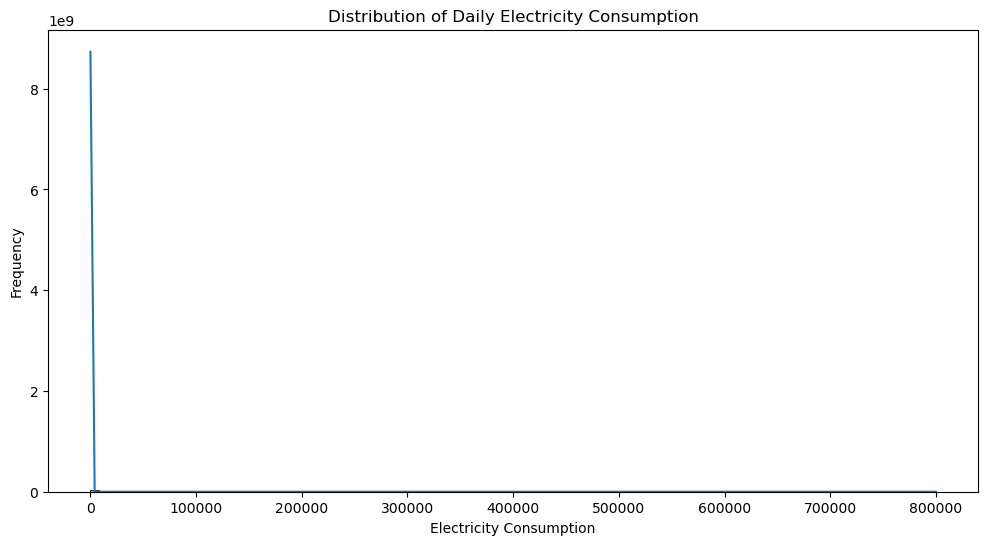

In [15]:
# Create a histogram plot for the flattened values of the DataFrame (excluding the last two columns)
plt.figure(figsize=(12, 6))
sns.histplot(df.iloc[:, :-2].values.flatten(), bins=100, kde=True)
plt.title('Distribution of Daily Electricity Consumption')
plt.xlabel('Electricity Consumption')
plt.ylabel('Frequency')
plt.show()

According to the Statistical summary of the dataset, the majority of the average values for each day are around 30. Therefore, values less than 60 are filtered out.

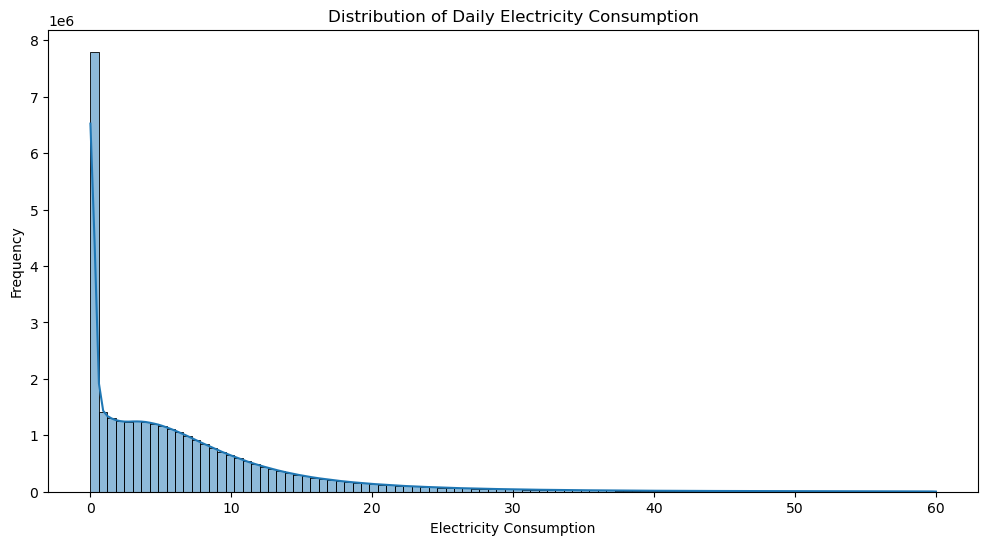

In [16]:
# Histograms of electricity consumption for values less than 60
plt.figure(figsize=(12, 6))
sns.histplot(df.iloc[:, :-2].values.flatten()[df.iloc[:, :-2].values.flatten() <= 60], bins=100, kde=True)
plt.title('Distribution of Daily Electricity Consumption')
plt.xlabel('Electricity Consumption')
plt.ylabel('Frequency')
plt.show()

## Transformation of Electricity Consumption Data to Long Format

In [17]:
# Create a copy of the original DataFrame to avoid permanent change
filtered_df = df.copy()

# "Melt" the filtered DataFrame to long format
melted_df = pd.melt(filtered_df, id_vars=['CONS_NO', 'FLAG'], var_name='Date', value_name='Electricity Consumption')

# Convert the 'Date' column to date format
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%m/%d/%Y')

## Violin plot of electricity consumption and FLAG (theft indicator)

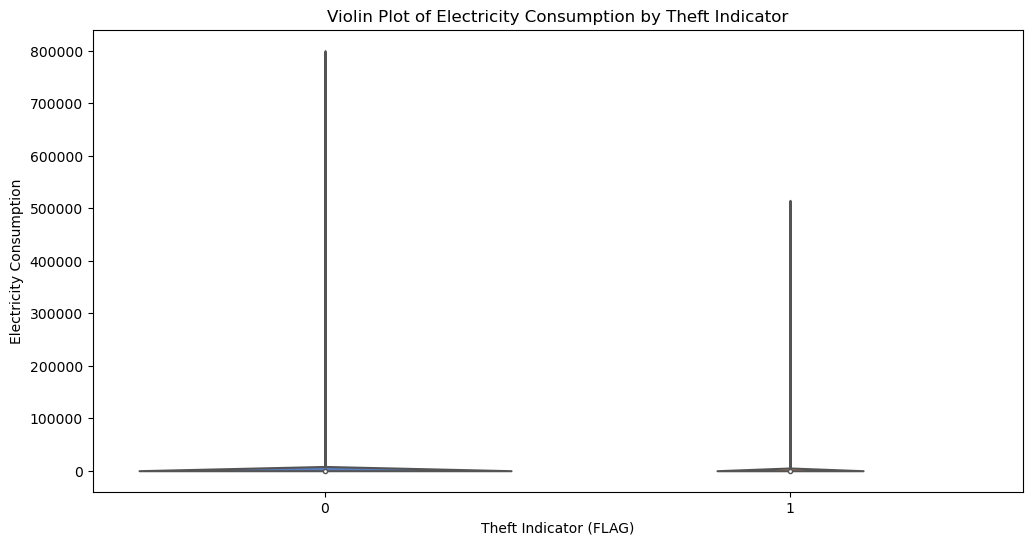

In [18]:
# Create a violin plot using seaborn to visualize the distribution of electricity consumption
# based on the 'FLAG' (Theft Indicator) and 'Electricity Consumption' columns in the melted DataFrame
plt.figure(figsize=(12, 6))
sns.violinplot(x='FLAG', y='Electricity Consumption', data=melted_df, palette='muted')
plt.title('Violin Plot of Electricity Consumption by Theft Indicator')
plt.xlabel('Theft Indicator (FLAG)')
plt.ylabel('Electricity Consumption')
plt.show()

### Distribution of data of FLAG (theft indicator)

Text(0, 0.5, 'Number of Users')

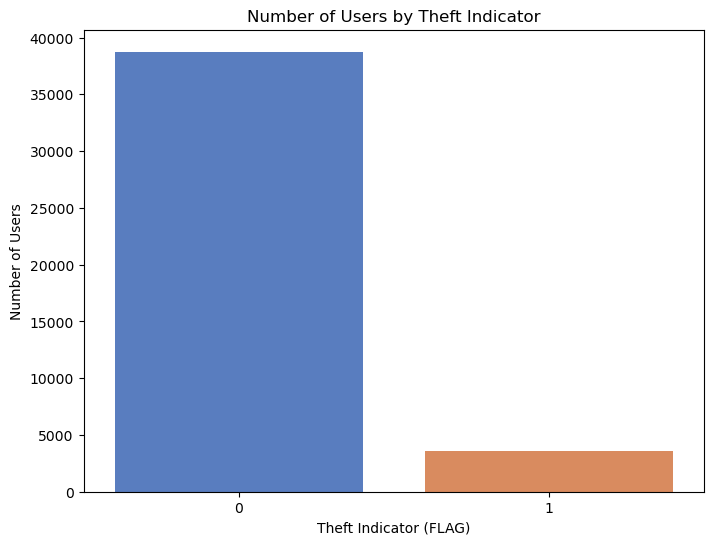

In [19]:
# Count the number of users by FLAG
user_count_by_flag = df['FLAG'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=user_count_by_flag.index, y=user_count_by_flag.values, palette='muted')
plt.title('Number of Users by Theft Indicator')
plt.xlabel('Theft Indicator (FLAG)')
plt.ylabel('Number of Users')

### Evaluate if there are repeated values for the user IDs

In [20]:
# Count the unique and duplicate values in the 'CONS_NO' column of the original dataset
cons_no_counts_original = df['CONS_NO'].value_counts()

# Display the count of unique and duplicate values
print(f"Number of unique values in CONS_NO: {cons_no_counts_original.size}")
print(f"Number of duplicate values in CONS_NO: {cons_no_counts_original[cons_no_counts_original > 1].size}")

Number of unique values in CONS_NO: 42372
Number of duplicate values in CONS_NO: 0


# Analysis with data clean
##  Delete unnecessary columns
Due to the fact that the 'CONS_NO' column represents a unique identifier for each user, it can be deleted or kept as the index of the dataset. It has been decided to delete it as it does not provide true utility for this project.

Similar to the columns that were identified as almost empty, they will be deleted since they are not many and do not contribute.

In [21]:
# Load a copy of the dataset
df_index = df.copy()

# Delete columns
df_index.drop(['CONS_NO','10/3/2014'],axis=1,inplace=True)

In [22]:
# Visualize 5 random rows
df_index.sample(5)

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
6372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,2.01,0.00,0.00,0.00,0.80,0.00,0.0,0.87,0
32282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
28095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.46,4.26,3.71,4.42,3.86,4.32,3.81,3.0,3.09,0
7325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
3309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0


In [23]:
# Size of the old dataset
df.shape

(42372, 1036)

In [24]:
# Size of the dataset
df_index.shape

(42372, 1034)

## Balance data with Undersampling
At the beginning, SMOTE (Synthetic Minority Over-sampling Technique) was considered to address data imbalance; however, the results were not satisfactory. Therefore, the decision was made to use undersampling

In [25]:
# Remove data from the majority class (FLAG = 0)
df_clean = df_index.copy()
df_minority = df_clean[df_clean['FLAG'] == 1]
df_majority = df_clean[df_clean['FLAG'] == 0].sample(len(df_minority))
df_undersampling = pd.concat([df_minority, df_majority]).reset_index()

In [26]:
df_undersampling.shape

(7230, 1035)

## Perform data imputation on the null data (Null data)
For this purpose, the sklearn library called impute will be used.

In [27]:
# Load a copy of the dataset
df_index = df_undersampling.copy()

In [28]:
# Delete columns
df_index.drop(['index'],axis=1,inplace=True)

In [29]:
# Load a copy of the dataset
df_filtered = df_index.copy()

In [30]:
# Drop the target column that has no null values to perform imputation
df_filtered.drop(['FLAG'],axis=1,inplace=True)

In [31]:
# Impute the data with respect to 5 neighbors
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df_filtered)
imputed.shape

(7230, 1033)

In [32]:
# Create a new dataset with the imputed data
df_imputed = pd.DataFrame(imputed, columns=df_filtered.columns)

In [33]:
# Show information about the DataFrame after imputation
print("DataFrame information after imputation:")
print(df_imputed.info())

DataFrame information after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7230 entries, 0 to 7229
Columns: 1033 entries, 1/1/2014 to 10/31/2016
dtypes: float64(1033)
memory usage: 57.0 MB
None


## Reassemble the dataset with the target column

In [34]:
# Copy of the inputed dataset
df_low = df_imputed.copy()

In [35]:
# Add the FLAG column again
df_low['FLAG'] = df_undersampling['FLAG']

In [36]:
# New size of the dataset
df_low.shape 

(7230, 1034)

## Analyze what portion of the total data is null

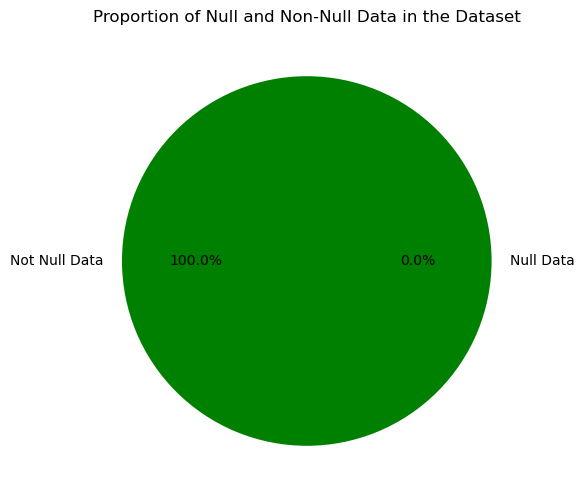

In [37]:
# Calculate the total count of null and non-null values in the dataset
total_nulls = df_low.isnull().sum().sum()
total_non_nulls = df_low.notnull().sum().sum()
# Create a DataFrame with the results
total_data_counts = pd.DataFrame({'Null Data': [total_nulls], 'Not Null Data': [total_non_nulls]})

# Plot the result on a pie chart.
plt.figure(figsize=(6, 6))
plt.pie(total_data_counts.iloc[0], labels=total_data_counts.columns, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Proportion of Null and Non-Null Data in the Dataset')
plt.show()

## Histograms and distribution of electricity consumption

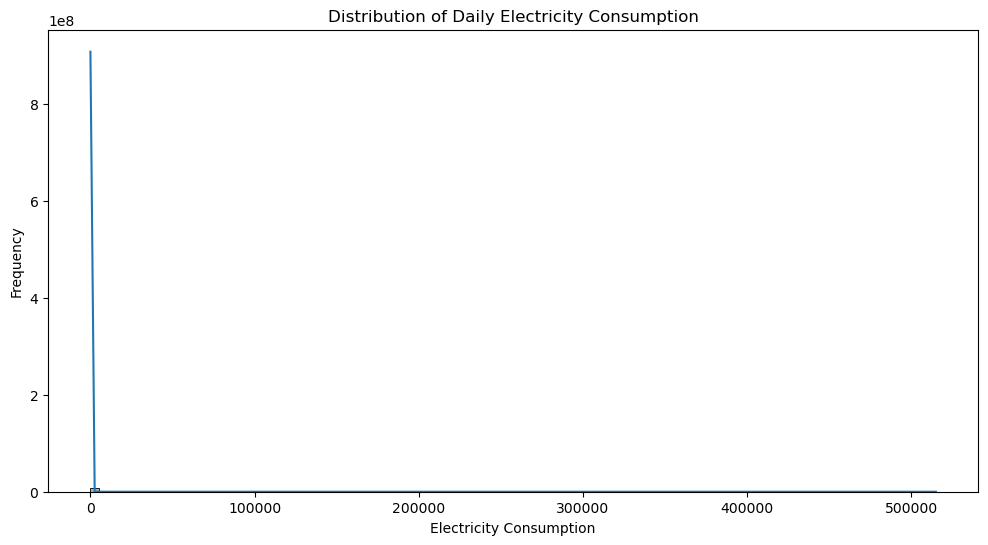

In [38]:
# Histograms and distribution of electricity consumption for values less than 60
plt.figure(figsize=(12, 6))
sns.histplot(df_low.iloc[:, :-1].values.flatten(), bins=100, kde=True)
plt.title('Distribution of Daily Electricity Consumption')
plt.xlabel('Electricity Consumption')
plt.ylabel('Frequency')
plt.show()

## Scatterplot of electricity consumption and FLAG (theft indicator)

In [39]:
# Create a copy of the original-clean DataFrame to avoid permanent change
filtered_df_low = df_low.copy()

# "Melt" the filtered DataFrame to long format
melted_df_low = pd.melt(filtered_df_low, id_vars=['FLAG'], var_name='Date', value_name='Electricity Consumption')

# Convert the 'Date' column to date format
melted_df_low['Date'] = pd.to_datetime(melted_df_low['Date'], format='%m/%d/%Y')

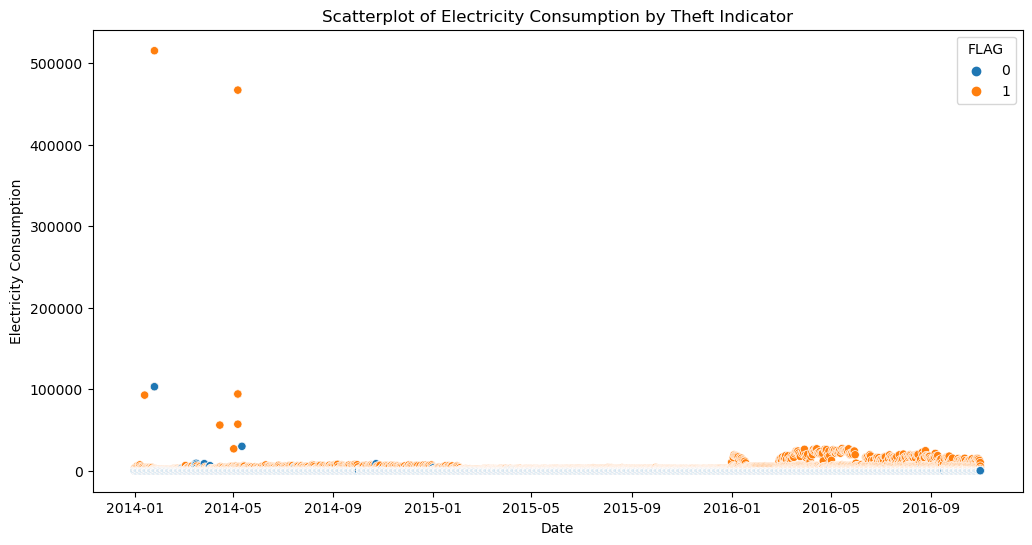

In [40]:
# Create the scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Electricity Consumption', hue='FLAG', data=melted_df_low)
plt.title('Scatterplot of Electricity Consumption by Theft Indicator')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

### A zoom on the graph
To perform a better analysis of the data, we will remove excessively large values and separate the classes so that they can be visualized more clearly

In [153]:
# Create a copy of the original-clean DataFrame to avoid permanent changes
filtered_df_low = df_low.copy()

# "Melt" the filtered DataFrame to long format
melted_df_low = pd.melt(filtered_df_low, id_vars=['FLAG'], var_name='Date', value_name='Electricity Consumption')

In [151]:
# Convert the 'Date' column to date format
melted_df_low['Date'] = pd.to_datetime(melted_df_low['Date'], format='%m/%d/%Y')

In [152]:
# Filter out records with electricity consumption above 3,000
melted_df_low = melted_df_low[melted_df_low['Electricity Consumption'] <= 3000]

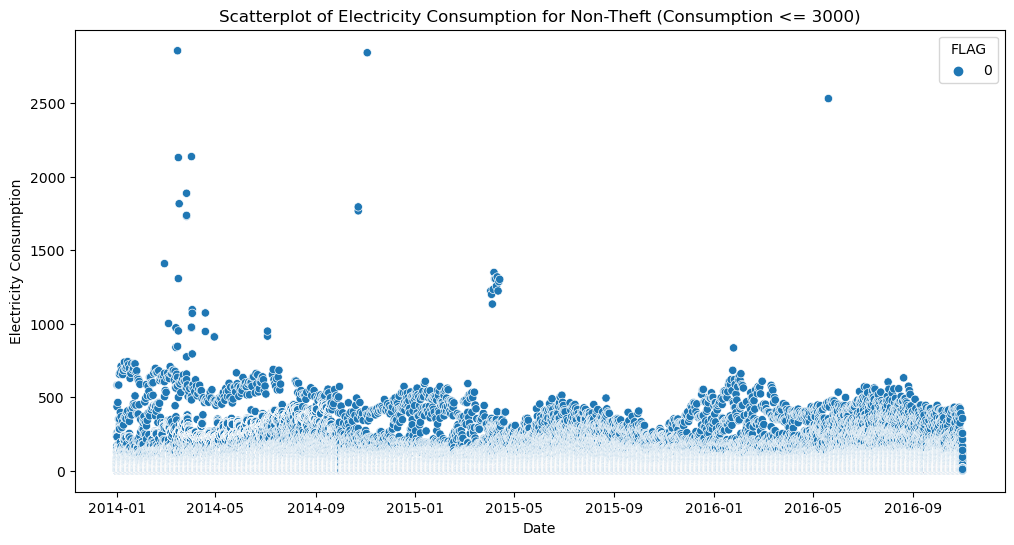

C:\Users\JDLondon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


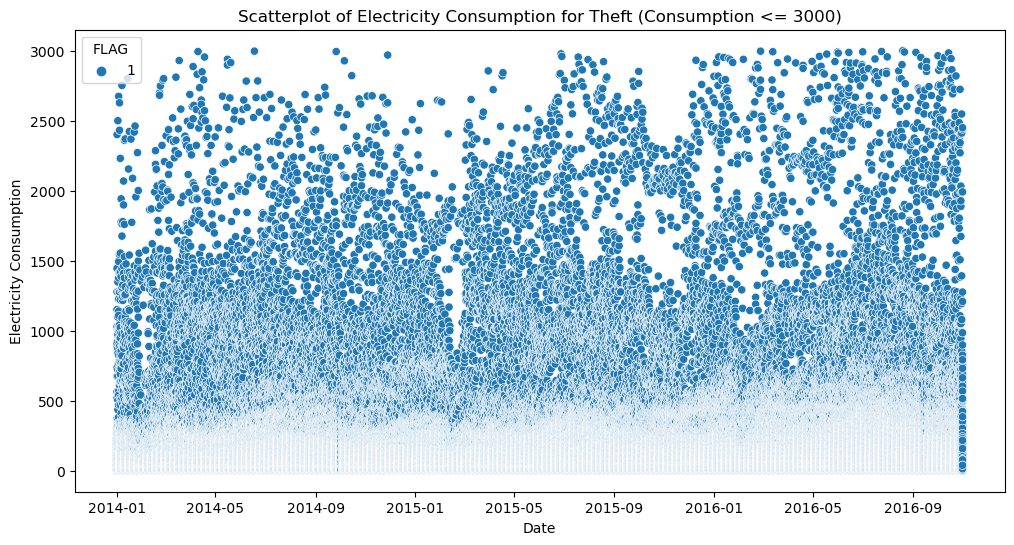

In [148]:
# Create separate scatterplots for each class of 'FLAG'
# Scatterplot for Non-Theft
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Electricity Consumption', hue='FLAG', data=melted_df_low[melted_df_low['FLAG'] == 0])
plt.title('Scatterplot of Electricity Consumption for Non-Theft (Consumption <= 3000)')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

# Scatterplot for Theft
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Electricity Consumption', hue='FLAG', data=melted_df_low[melted_df_low['FLAG'] == 1])
plt.title('Scatterplot of Electricity Consumption for Theft (Consumption <= 3000)')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

### Evaluating consumption over time
To analyze possible disparities in user behavior based on whether they are labeled as '1' or '0' in terms of energy theft, a linear graphical representation of the monthly mean consumption over time is performed. The goal is to identify patterns or notable variations associated with the energy theft classification

In [ ]:
# Copy cleaned DataFrame to avoid direct modifications
df_month = df_low.copy()

# Reset the DataFrame index and create a new 'index' column
df_month.reset_index(inplace=True)

In [ ]:
# Get columns containing dates
date_columns = df_month.columns[1:-1]

In [ ]:
# Convert the DataFrame from wide to long format (melt)
melted_df_low = pd.melt(df_month, id_vars=['index', 'FLAG'], var_name='Date', value_name='Electricity Consumption')

In [ ]:
# Convert the 'Date' column to datetime objects
melted_df_low['Date'] = pd.to_datetime(melted_df_low['Date'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# Calculate the daily average electricity consumption
daily_consumption = melted_df_low.groupby(['index', 'Date', 'FLAG'])['Electricity Consumption'].mean().reset_index()

In [ ]:
# Set the number of sample users
users_sample = 5

# Randomly select 5 users with FLAG equal to 0 (low consumption)
negative_samples = np.random.choice(daily_consumption[daily_consumption['FLAG'] == 0]['index'].unique(), users_sample, replace=False)

# Randomly select 5 users with FLAG equal to 1 (high consumption)
positive_samples = np.random.choice(daily_consumption[daily_consumption['FLAG'] == 1]['index'].unique(), users_sample, replace=False)

In [144]:
# Combine the selected indices (sample users)
index_selected = np.concatenate([negative_samples, positive_samples])

In [154]:
# Filter the original DataFrame to include only rows of the selected users
selected_users_df = daily_consumption[daily_consumption['index'].isin(index_selected)]

selected_users_df

,index,Date,FLAG,Electricity Consumption
170445,165,2014-01-01,1,0.00
170446,165,2014-01-02,1,0.00
170447,165,2014-01-03,1,0.00
170448,165,2014-01-04,1,0.00
170449,165,2014-01-05,1,0.00
...,...,...,...,...
6150477,5953,2016-10-27,0,9.16
6150478,5953,2016-10-28,0,10.66
6150479,5953,2016-10-29,0,9.50
6150480,5953,2016-10-30,0,7.07


In [ ]:
# Make sure the 'Date' column is in datetime format
selected_users_df['Date'] = pd.to_datetime(selected_users_df['Date'])

# Create a new column 'YearMonth' containing the combination of year and month
selected_users_df['YearMonth'] = selected_users_df['Date'].dt.to_period('M')

In [145]:
# Initialize variables for tracking
previous_month = None
monthly_consumption = 0
day_counter = 0
results = []

# Iterate through the DataFrame
for index, row in selected_users_df.iterrows():
    # Check if the date is the first day of the month
    if row['Date'].day == 1:
        # Calculate the average for the previous month if there is data
        if previous_month is not None:
            average = monthly_consumption / day_counter
            results.append({'UserIndex': selected_users_df.at[index, 'index'], 'YearMonth': previous_month, 'AverageConsumption': average, 'FLAG': selected_users_df.at[index, 'FLAG']})
        
        # Reset variables for the new month
        previous_month = row['YearMonth']
        monthly_consumption = 0
        day_counter = 0
    
    # Add the daily consumption to the monthly total
    monthly_consumption += row['Electricity Consumption']
    day_counter += 1

# Calculate the average for the last month if there is data
if previous_month is not None:
    average = monthly_consumption / day_counter
    results.append({'UserIndex': selected_users_df.at[index, 'index'], 'YearMonth': previous_month, 'AverageConsumption': average, 'FLAG': selected_users_df.at[index, 'FLAG']})

# Create a DataFrame with the results
df_results = pd.DataFrame(results)

df_results

C:\Users\JDLondon\AppData\Local\Temp\ipykernel_17204\3014609656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_users_df['Date'] = pd.to_datetime(selected_users_df['Date'])
C:\Users\JDLondon\AppData\Local\Temp\ipykernel_17204\3014609656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_users_df['YearMonth'] = selected_users_df['Date'].dt.to_period('M')


,UserIndex,YearMonth,AverageConsumption,FLAG
0,165,2014-01,0.000000,1
1,165,2014-02,2.002000,1
2,165,2014-03,7.115935,1
3,165,2014-04,6.028533,1
4,165,2014-05,10.085161,1
...,...,...,...,...
335,5953,2016-06,14.316333,0
336,5953,2016-07,21.027097,0
337,5953,2016-08,18.136129,0
338,5953,2016-09,9.340345,0


In [146]:
# Convert 'YearMonth' to a timestamp
df_results['YearMonth'] = df_results['YearMonth'].dt.to_timestamp()

# Sort the DataFrame by 'UserIndex' and 'YearMonth'
df_results = df_results.sort_values(by=['UserIndex', 'YearMonth'])

In [ ]:
# Separate data by FLAG
df_flag_0 = df_results[df_results['FLAG'] == 0]
df_flag_1 = df_results[df_results['FLAG'] == 1]

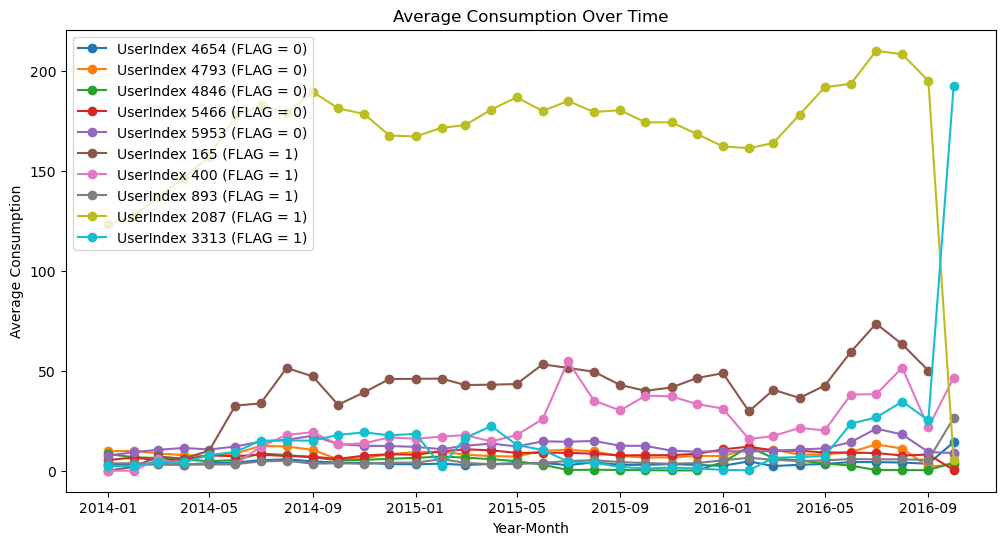

In [147]:
# Create the line plot
plt.figure(figsize=(12, 6))

# Plot for FLAG = 0
for user_index, group in df_flag_0.groupby('UserIndex'):
    plt.plot(group['YearMonth'], group['AverageConsumption'], label=f'UserIndex {user_index} (FLAG = 0)', linestyle='-', marker='o')

# Plot for FLAG = 1
for user_index, group in df_flag_1.groupby('UserIndex'):
    plt.plot(group['YearMonth'], group['AverageConsumption'], label=f'UserIndex {user_index} (FLAG = 1)', linestyle='-', marker='o')

# Add labels and legend
plt.title('Average Consumption Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Consumption')
plt.legend(loc='upper left')

# Show the plot
plt.show()

## Violin plot of electricity consumption and FLAG (theft indicator)

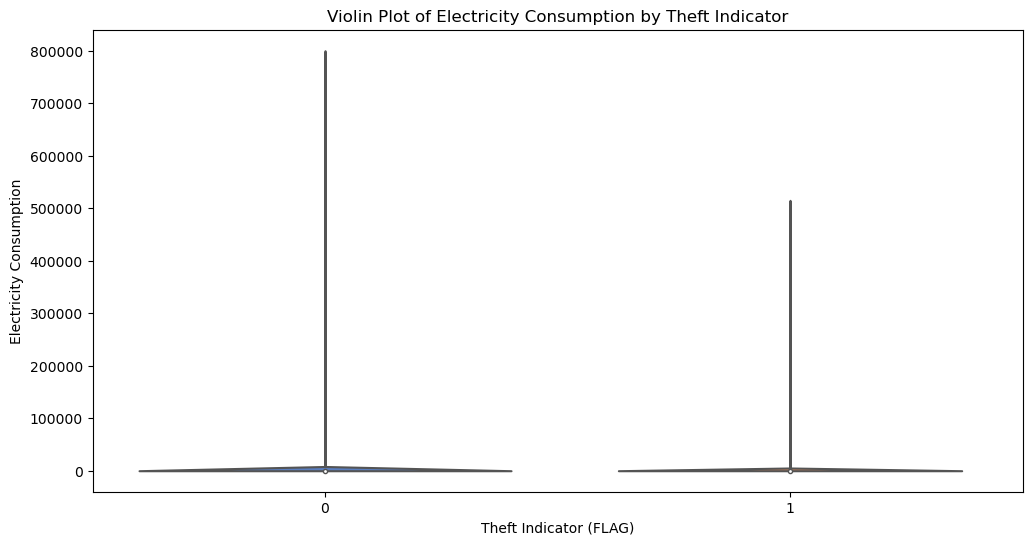

In [226]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='FLAG', y='Electricity Consumption', data=melted_df_low, palette='muted')
plt.title('Violin Plot of Electricity Consumption by Theft Indicator')
plt.xlabel('Theft Indicator (FLAG)')
plt.ylabel('Electricity Consumption')
plt.show()

## Distribution of data of FLAG (theft indicator)

In [227]:
# Count the number of users by FLAG
user_count_by_flag_clean = df_low['FLAG'].value_counts()

Text(0, 0.5, 'Number of Users')

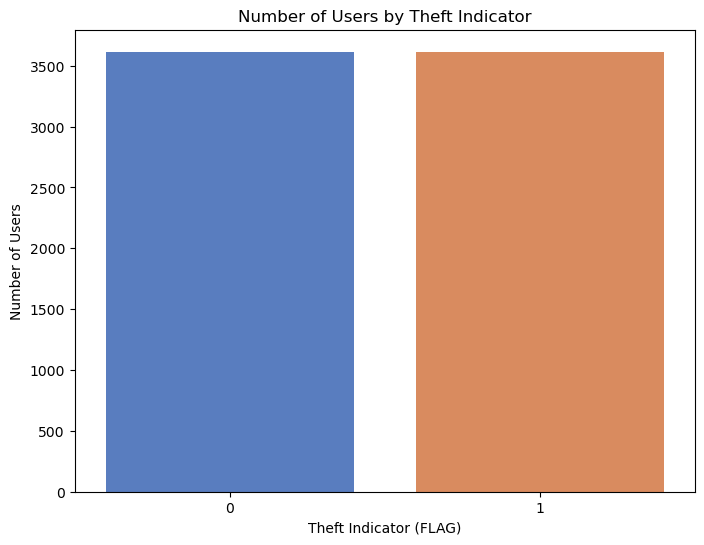

In [228]:
# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=user_count_by_flag_clean.index, y=user_count_by_flag_clean.values, palette='muted')
plt.title('Number of Users by Theft Indicator')
plt.xlabel('Theft Indicator (FLAG)')
plt.ylabel('Number of Users')

# Split data into training and testing

In [229]:
# Splitting the data from the label
X = df_low.drop(['FLAG'], axis=1)
y = df_low['FLAG']

In [230]:
# Splitting the training data from the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model Evaluation

## K-Nearest Neighbors (KNN)

### Build the model (KNN)

In [231]:
# Initialize a KNN model
knn = KNeighborsClassifier()

# Define the parameter grid to explore
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the GridSearchCV object for KNN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='recall')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

### Calculate efficiency  (KNN)

In [232]:
# Get the best parameters found by the grid search
best_params_knn = grid_search_knn.best_params_

In [233]:
# Make predictions on the test set using the fitted model
y_pred_knn = grid_search_knn.predict(X_test)

In [234]:
# Evaluate the performance of the KNN model with the best parameters
accuracy_best_knn = accuracy_score(y_test, y_pred_knn)

In [235]:
# Show the classification report for KNN
print(f"Accuracy (K-Nearest Neighbors (KNN) - Best Parameters): {accuracy_best_knn:.2f}")
print("Mejores parámetros para KNN:", best_params_knn)
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

Accuracy (K-Nearest Neighbors (KNN) - Best Parameters): 0.64
Mejores parámetros para KNN: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.61      0.73      0.67       704
           1       0.69      0.56      0.62       742

    accuracy                           0.64      1446
   macro avg       0.65      0.65      0.64      1446
weighted avg       0.65      0.64      0.64      1446



### Evaluating classifier (KNN)

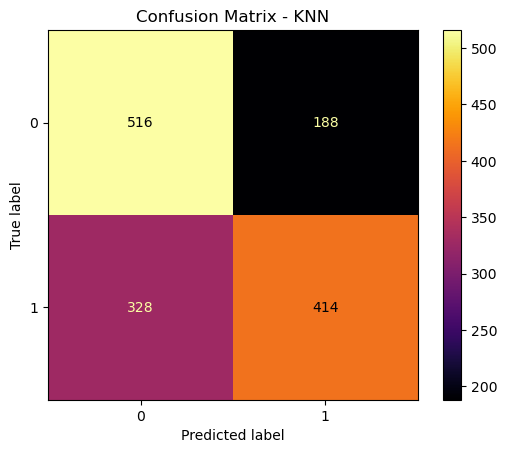

In [236]:
# Create the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=grid_search_knn.classes_)
disp_knn.plot(cmap='inferno')
plt.title('Confusion Matrix - KNN')
plt.show()

## Decision Trees

### Build the model (DT)

In [237]:
# Initialize a Decision Tree model
dt = DecisionTreeClassifier()

# Define the parameter grid to explore
param_grid_dt = {
    'max_depth': [10, 20, 30], 
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='recall')

# Fit the model to the training data
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

### Calculate efficiency (DT)

In [238]:
# Get the best parameters found by the grid search
best_params_dt = grid_search_dt.best_params_

# Make predictions on the test set using the fitted model
y_pred_dt = grid_search_dt.predict(X_test)

# Evaluate the performance of the Decision Tree model with the best parameters
accuracy_best_dt = accuracy_score(y_test, y_pred_dt)

# Show the classification report for Decision Tree
print(f"Accuracy (Decision Trees - Best Parameters): {accuracy_best_dt:.2f}")
print("Best parameters for Decision Trees:", best_params_dt)
print("Classification Report (Decision Trees):")
print(classification_report(y_test, y_pred_dt))

Accuracy (Decision Trees - Best Parameters): 0.63
Best parameters for Decision Trees: {'max_depth': 30, 'min_samples_split': 2}
Classification Report (Decision Trees):
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       704
           1       0.64      0.61      0.63       742

    accuracy                           0.63      1446
   macro avg       0.63      0.63      0.63      1446
weighted avg       0.63      0.63      0.63      1446



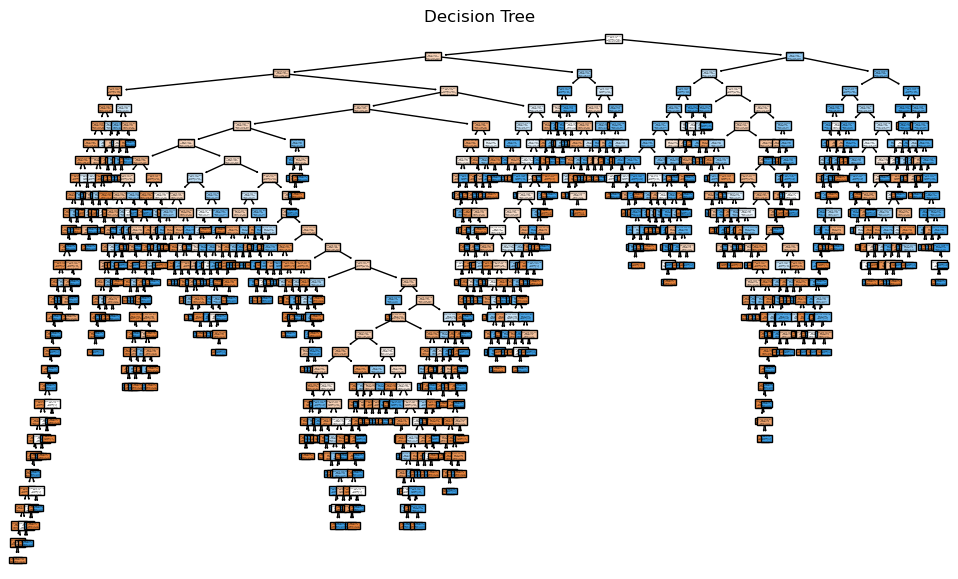

In [239]:
# The decision tree is diagrammed
plt.figure(figsize=(12, 7))
plot_tree(grid_search_dt.best_estimator_, filled=True, feature_names=X.columns, class_names=["No Robo", "Robo"])
plt.title("Decision Tree")
plt.show()

### Evaluating classifier (DT)

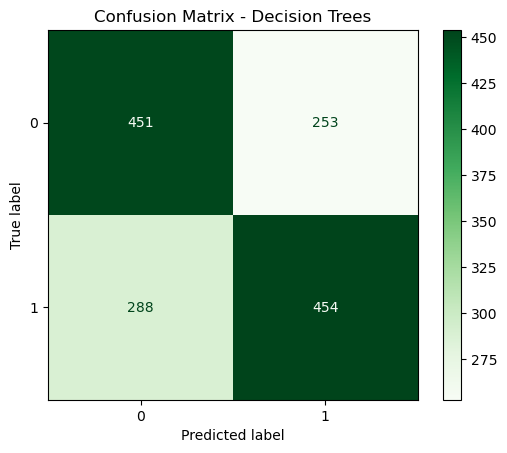

In [240]:
# Create the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=grid_search_dt.classes_)
disp_dt.plot(cmap='Greens')
plt.title('Confusion Matrix - Decision Trees')
plt.show()

## Support Vector Machines (SVMs)

### Build the model (SVM)

In [241]:
# Initialize a SVM model
svm = SVC(random_state=42)

# Define the parameter grid to explore
param_grid_svm = {
    'C': [10,20],
    'kernel': ['rbf'],
    'gamma': ['scale','auto']
}

# Initialize the GridSearchCV object for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='recall')

# Fit the model to the training data
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='recall')

### Calculate efficiency (SVM)

In [242]:
# Get the best parameters found by the grid search
best_params_svm = grid_search_svm.best_params_

# Make predictions on the test set using the fitted model
y_pred_svm = grid_search_svm.predict(X_test)

# Evaluate the performance of the SVM model with the best parameters
accuracy_best_svm = accuracy_score(y_test, y_pred_svm)

# Show the classification report for SVM
print(f"Accuracy (Decision Trees - Best Parameters): {accuracy_best_svm:.2f}")
print("Best parameters for SVM:", best_params_svm)
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Accuracy (Decision Trees - Best Parameters): 0.60
Best parameters for SVM: {'C': 20, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.76      0.27      0.40       704
           1       0.57      0.92      0.70       742

    accuracy                           0.60      1446
   macro avg       0.66      0.59      0.55      1446
weighted avg       0.66      0.60      0.55      1446



### Evaluating classifier (SVM)

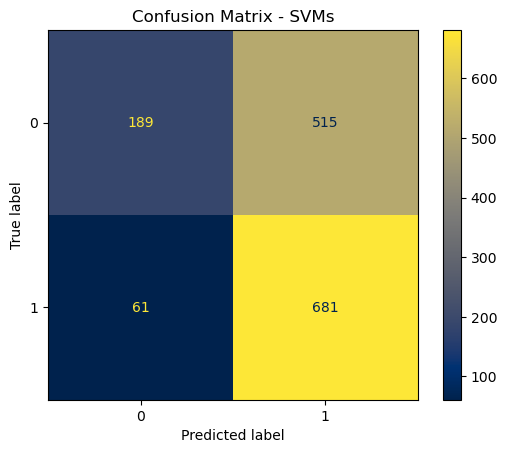

In [243]:
# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=grid_search_svm.classes_)
disp_dt.plot(cmap='cividis')
plt.title('Confusion Matrix - SVMs')
plt.show()

## RandomForest

### Build the model (RF)

In [244]:
# Initialize a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to explore
param_grid_rf = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'bootstrap': [False]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='recall', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [10, 20],
                         'n_estimators': [50, 200]},
             scoring='recall')

### Calculate efficiency (RF)

In [245]:
# Get the best parameters found by the grid search
best_params_rf = grid_search_rf.best_params_


# Use the model with the best parameters to make predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the performance of the Random Forest model with the best parameters
accuracy_best_rf = accuracy_score(y_test, y_pred_rf)

# Show the classification report with the best parameters
print(f"Best Parameters: {best_params_rf}")
print(f"Accuracy (Random Forest - Best Parameters): {accuracy_best_rf:.2f}")
print("Classification Report (Random Forest - Best Parameters):")
print(classification_report(y_test, y_pred_rf))

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'n_estimators': 200}
Accuracy (Random Forest - Best Parameters): 0.72
Classification Report (Random Forest - Best Parameters):
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       704
           1       0.74      0.71      0.73       742

    accuracy                           0.72      1446
   macro avg       0.72      0.72      0.72      1446
weighted avg       0.72      0.72      0.72      1446



### Evaluating classifier (RF)

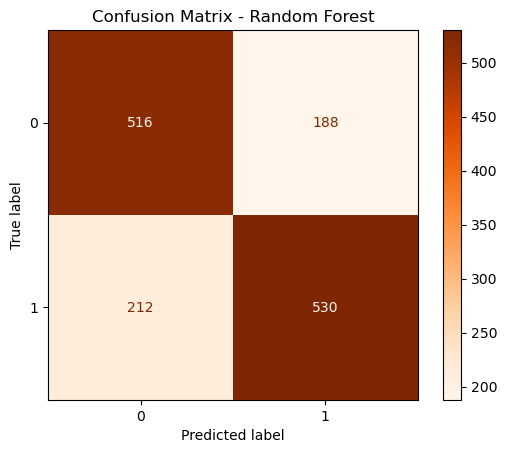

In [246]:
# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_dt.plot(cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Gradient Boosting

### Build the model (GB)

In [247]:
# Initialize a Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Define the parameter grid to explore
param_grid = {
    'n_estimators': [50],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='recall', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50]},
             scoring='recall')

### Calculate efficiency (GB)

In [248]:
# Get the best parameters found by the grid search
best_params_gb = grid_search_gb.best_params_

# Use the model with the best parameters to make predictions
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Evaluate the performance of the Gradient Boosting model with the best parameters
accuracy_best_gb = accuracy_score(y_test, y_pred_gb)

# Visualize the confusion matrix
print(f"Best Parameters (Gradient Boosting): {best_params_gb}")
print(f"Accuracy (Gradient Boosting - Best Parameters): {accuracy_best_gb:.2f}")
print("Classification Report (Gradient Boosting - Best Parameters):")
print(classification_report(y_test, y_pred_gb))

Best Parameters (Gradient Boosting): {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (Gradient Boosting - Best Parameters): 0.72
Classification Report (Gradient Boosting - Best Parameters):
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       704
           1       0.75      0.66      0.71       742

    accuracy                           0.72      1446
   macro avg       0.72      0.72      0.72      1446
weighted avg       0.72      0.72      0.72      1446



### Evaluating classifier (GB)

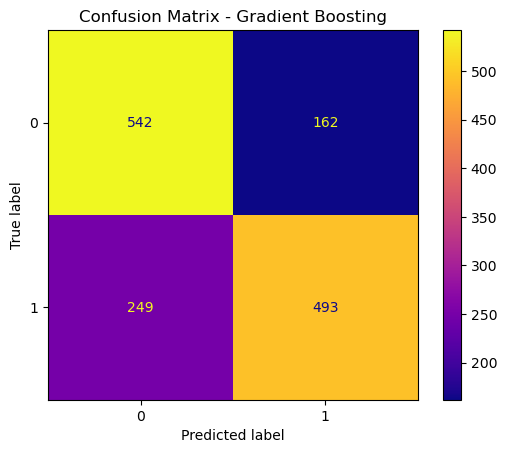

In [249]:
# Create the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Visualize the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=grid_search_gb.classes_)
disp_dt.plot(cmap='plasma')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

## XGBoost

### Build the model (XGBoost)

In [250]:
# Initialize a XGBoost
xgb = XGBClassifier(random_state=42)

# Define the parameter grid to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.2],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2], 'learning_rate': [0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

### Calculate efficiency (XGBoost)

In [251]:
# Get the best parameters found by the grid search
best_params_xgb = grid_search_xgb.best_params_

# Use the model with the best parameters to make predictions
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the performance of the XGBoost model with the best parameters
accuracy_best_xgb = accuracy_score(y_test, y_pred_xgb)

# Visualize the confusion matrix
print(f"Accuracy (XGBoost - Best Parameters): {accuracy_best_xgb:.2f}")
print(f"Best Parameters (XGBoost): {best_params_xgb}")
print("Classification Report (XGBoost - Best Parameters):")
print(classification_report(y_test, y_pred_xgb))

Accuracy (XGBoost - Best Parameters): 0.72
Best Parameters (XGBoost): {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 100}
Classification Report (XGBoost - Best Parameters):
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       704
           1       0.75      0.69      0.72       742

    accuracy                           0.72      1446
   macro avg       0.73      0.72      0.72      1446
weighted avg       0.73      0.72      0.72      1446



### Evaluating classifier (XGBoost)

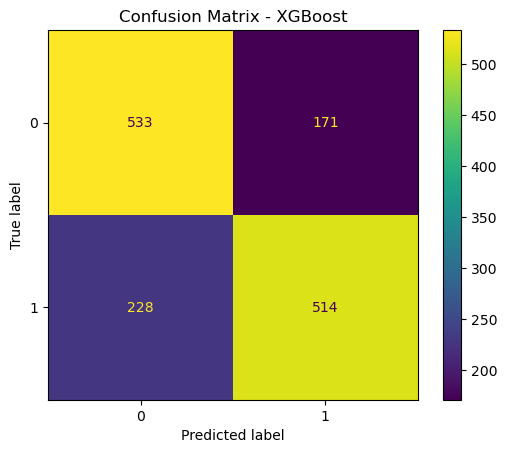

In [252]:
# Create the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=grid_search_xgb.classes_)
disp_dt.plot(cmap='viridis')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## Neural Networks

### Build the model (NN)

In [253]:
# Initialize the neural network model
mlp = MLPClassifier(random_state=42)

# Define the parameters you want to adjust
param_grid_mlp = {
    'hidden_layer_sizes': [(30, 20, 10)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Initialize the GridSearchCV object for MLP
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='recall')

# Fit the model to the training data
grid_search_mlp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(30, 20, 10)]},
             scoring='recall')

### Calculate efficiency (NN)

In [254]:
# Obtain the best parameters found by the grid search
best_params_mlp = grid_search_mlp.best_params_

# Make predictions on the test set using the fitted model
y_pred_mlp_best = grid_search_mlp.predict(X_test)

# Evaluate the performance of the Neural Network model with the best parameters
accuracy_best_mlp = accuracy_score(y_test, y_pred_mlp_best)

# Display the classification report for MLP with the best parameters
print(f"Accuracy (MLP): {accuracy_best_mlp:.2f}")
print("Best parameters for MLP:", best_params_mlp)
print(classification_report(y_test, y_pred_mlp_best))

Accuracy (MLP): 0.64
Best parameters for MLP: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (30, 20, 10)}
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       704
           1       0.67      0.58      0.62       742

    accuracy                           0.64      1446
   macro avg       0.64      0.64      0.64      1446
weighted avg       0.64      0.64      0.64      1446



### Evaluating classifier (NN)

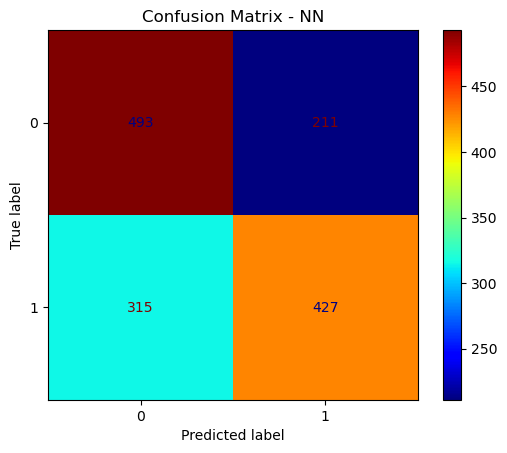

In [255]:
# Create the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp_best)

# Visualize the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=grid_search_mlp.classes_)
disp_dt.plot(cmap='jet')
plt.title('Confusion Matrix - NN')
plt.show()

# Summarizing results and choosing the best model

In [256]:
# Create a dictionary with the results
results = {
    "Model": ["KNN", "Decision Trees", "SVM", "Random Forest", "Gradient Boosting", "XGBoost", "Neural Networks"],
    "Accuracy (%)": [
        accuracy_best_knn*100,
        accuracy_best_dt*100,
        accuracy_best_svm*100,
        accuracy_best_rf*100,
        accuracy_best_gb*100,
        accuracy_best_xgb*100,
        accuracy_best_mlp*100],
    "Recall (Flag 1) (%)": [
        (float(classification_report(y_test, y_pred_knn).split()[11])*100),
        (float(classification_report(y_test, y_pred_dt).split()[11])*100),
        (float(classification_report(y_test, y_pred_svm).split()[11])*100),
        (float(classification_report(y_test, y_pred_rf).split()[11])*100),
        (float(classification_report(y_test, y_pred_gb).split()[11])*100),
        (float(classification_report(y_test, y_pred_xgb).split()[11])*100),
        (float(classification_report(y_test, y_pred_mlp_best).split()[11])*100)]
}

# Convert the dictionary into a Pandas DataFrame
df_results = pd.DataFrame(results)

# Print the table using tabulate
print(tabulate(df_results, headers='keys', tablefmt='grid'))

+----+-------------------+----------------+-----------------------+
|    | Model             |   Accuracy (%) |   Recall (Flag 1) (%) |
+====+===================+================+=======================+
|  0 | KNN               |        64.3154 |                    56 |
+----+-------------------+----------------+-----------------------+
|  1 | Decision Trees    |        62.5864 |                    61 |
+----+-------------------+----------------+-----------------------+
|  2 | SVM               |        60.166  |                    92 |
+----+-------------------+----------------+-----------------------+
|  3 | Random Forest     |        72.3375 |                    71 |
+----+-------------------+----------------+-----------------------+
|  4 | Gradient Boosting |        71.5768 |                    66 |
+----+-------------------+----------------+-----------------------+
|  5 | XGBoost           |        72.4066 |                    69 |
+----+-------------------+----------------+-----

# K-fold cross-validation
The K-fold cross-validation method was chosen to evaluate the performance of the models

## K-fold cross-validation for the subset of data

In [263]:
# KNN
knn_cv_scores = cross_val_score(grid_search_knn.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for KNN:", knn_cv_scores)
print("Mean Recall:", knn_cv_scores.mean())

# Decision Trees
dt_cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for DT:", dt_cv_scores)
print("Mean Recall:", dt_cv_scores.mean())

# SVMc
svm_cv_scores = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for SVM:", svm_cv_scores)
print("Mean Recall:", svm_cv_scores.mean())

# Random Forest model
rf_cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for Random Forest:", rf_cv_scores)
print("Mean Recall:", rf_cv_scores.mean())

# Gradient Boosting
gb_cv_scores = cross_val_score(grid_search_gb.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for Random Forest:", gb_cv_scores)
print("Mean Recall:", gb_cv_scores.mean())

# XGBoost model
xgb_cv_scores = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for XGBoost:", xgb_cv_scores)
print("Mean Recall:", xgb_cv_scores.mean())

# Neural Networks
nn_cv_scores = cross_val_score(grid_search_mlp.best_estimator_, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print("\nCross-validated Recall scores for Neural Networks:", nn_cv_scores)
print("Mean Recall:", nn_cv_scores.mean())


Cross-validated Recall scores for KNN: [0.52090592 0.52521739 0.54608696 0.5426087  0.54181185]
Mean Recall: 0.5353261627026209

Cross-validated Recall scores for DT: [0.59407666 0.58782609 0.62086957 0.62956522 0.60801394]
Mean Recall: 0.6080702923799425

Cross-validated Recall scores for SVM: [0.91637631 0.88173913 0.93043478 0.90782609 0.91986063]
Mean Recall: 0.9112473867595821

Cross-validated Recall scores for Random Forest: [0.67944251 0.6626087  0.73043478 0.68347826 0.69163763]
Mean Recall: 0.6895203757006514

Cross-validated Recall scores for Random Forest: [0.6533101  0.64       0.65565217 0.66086957 0.66202091]
Mean Recall: 0.6543705499166792
Cross-validated Recall scores for XGBoost: [0.66724739 0.66608696 0.71304348 0.65043478 0.68292683]
Mean Recall: 0.6759478866838358
Cross-validated Recall scores for Neural Networks: [0.55749129 0.80521739 0.66956522 0.53391304 0.71428571]
Mean Recall: 0.6560945311316468


In [292]:
# Data for each model
data = {
    'Best Params': [
        {'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
        {'max_depth': 30, 'min_samples_split': 2},
        {'C': 20, 'gamma': 'auto', 'kernel': 'rbf'},
        {'bootstrap': False, 'max_depth': 20, 'n_estimators': 200},
        {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50},
        {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 100},
        {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (30, 20, 10)}
    ],
    'Accuracy': [0.64, 0.63, 0.60, 0.72, 0.72, 0.72, 0.64],
    'Recall': [0.56, 0.61, 0.92, 0.71, 0.66, 0.69, 0.58],
    'K-Fold Mean Recall': [53.53, 60.81, 91.12, 68.95, 67.59, 67.59, 65.61]
}

# Create a DataFrame
df_resume = pd.DataFrame(data, index=['KNN', 'Decision Trees', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Neural Networks'])
df_resume.index.name = 'model'

# Calculate additional columns
df_resume['Precision'] = df_resume['Recall'] * df_resume['Accuracy'] / (2 * df_resume['Recall'] - df_resume['Accuracy'])
df_resume['F1 Score'] = 2 * (df_resume['Precision'] * df_resume['Recall']) / (df_resume['Precision'] + df_resume['Recall'])

df_resume

,Best Params,Accuracy,Recall,K-Fold Mean Recall,Precision,F1 Score
model,,,,,,
KNN,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.64,0.56,53.53,0.746667,0.64
Decision Trees,"{'max_depth': 30, 'min_samples_split': 2}",0.63,0.61,60.81,0.651356,0.63
SVM,"{'C': 20, 'gamma': 'auto', 'kernel': 'rbf'}",0.60,0.92,91.12,0.445161,0.60
Random Forest,"{'bootstrap': False, 'max_depth': 20, 'n_estim...",0.72,0.71,68.95,0.730286,0.72
Gradient Boosting,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.72,0.66,67.59,0.792000,0.72
XGBoost,"{'gamma': 0, 'learning_rate': 0.2, 'n_estimato...",0.72,0.69,67.59,0.752727,0.72
Neural Networks,"{'activation': 'logistic', 'alpha': 0.001, 'hi...",0.64,0.58,65.61,0.713846,0.64
